### Import Packages

In [1]:
import requests
import pandas as pd
import geopandas as gpd

### Getting Response From Query link and Display

In [2]:
response = requests.get('https://maps.dosm.gov.my/dosm/rest/services/StatsGeo_asal/MapServer/1/query?f=json&where=KOD_NEGERI%3D%2712%27&returnGeometry=true&spatialRel=esriSpatialRelIntersects&outFields=*&outSR=102100')
geojson = response.text
geojson

'{"displayFieldName":"NEGERI","fieldAliases":{"OBJECTID":"FID","NEGERI":"NEGERI","KOD_NEGERI":"KOD_NEGERI","SHAPE_LENG":"SHAPE_LENG","Shape.STArea()":"Shape.STArea()","Shape.STLength()":"Shape.STLength()"},"geometryType":"esriGeometryPolygon","spatialReference":{"wkid":102100,"latestWkid":3857},"fields":[{"name":"OBJECTID","type":"esriFieldTypeOID","alias":"FID"},{"name":"NEGERI","type":"esriFieldTypeString","alias":"NEGERI","length":17},{"name":"KOD_NEGERI","type":"esriFieldTypeString","alias":"KOD_NEGERI","length":2},{"name":"SHAPE_LENG","type":"esriFieldTypeDouble","alias":"SHAPE_LENG"},{"name":"Shape.STArea()","type":"esriFieldTypeDouble","alias":"Shape.STArea()"},{"name":"Shape.STLength()","type":"esriFieldTypeDouble","alias":"Shape.STLength()"}],"features":[{"attributes":{"OBJECTID":10,"NEGERI":"SABAH","KOD_NEGERI":"12","SHAPE_LENG":40.60858623,"Shape.STArea()":6.0523474054145039,"Shape.STLength()":40.608586224763968},"geometry":{"rings":[[[12919079.548418211,663960.36792107776],

### Reading Geojson in Python Geopandas And Plotting

<AxesSubplot:>

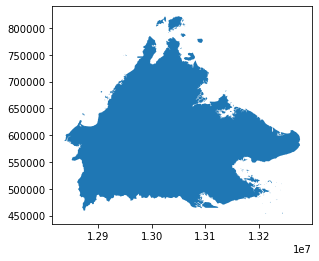

In [3]:
gdf = gpd.read_file(geojson)
gdf
gdf.plot()

### Reading Links CSV and Display

In [ ]:
df = pd.read_csv('links.csv')
df

### Loop on links in csv plot all geojson

In [ ]:
links = df['Link']

In [5]:
request = f'https://gis.dukcapil.kemendagri.go.id/arcgis/rest/services/Data_Baru_26092017/MapServer/2/query?f=json&where=&returnGeometry=true&spatialRel=esriSpatialRelIntersects&objectIds={7224}&outFields=*&outSR=102100'
response = requests.get(request)
response.text

'{"displayFieldName":"giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_siak","fieldAliases":{"giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid_1":"objectid_1","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid":"objectid","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_siak":"kode_siak","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak":"nama_siak","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_2017":"kode_2017","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_2017":"nama_2017","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.luas":"luas","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.data":"giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.data","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.objectid":"OID","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_prop":"no_prop","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_kab":"no_kab","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_kec":"no

In [7]:
filename = 1
object_id = 7224


for each in range(7280):
    request = f'https://gis.dukcapil.kemendagri.go.id/arcgis/rest/services/Data_Baru_26092017/MapServer/2/query?f=json&where=&returnGeometry=true&spatialRel=esriSpatialRelIntersects&objectIds={object_id}&outFields=*&outSR=102100'
    object_id+=1
    response = requests.get(request)
    geojson = response.text
    gdft = gpd.read_file(geojson)
    path = f'/home/lohitd@nextbillion.ai/Downloads/ID/{filename}.geojson'
    gdft.to_file(path, driver='GeoJSON')
    filename+=1

In [21]:
filename = 2

for each in range(7279):
    gdf_read = gpd.read_file(f'/home/lohitd@nextbillion.ai/Downloads/ID/{filename}.geojson')
    complete = pd.concat([complete,gdf_read], axis=0)
    filename+=1

In [25]:
complete.to_file('/home/lohitd@nextbillion.ai/Downloads/ID/id.geojson', driver ='GeoJSON')

In [73]:
complete1 = complete[["giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_prop_","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_kab_s","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_kec_s","geometry"]]

In [74]:
complete1 = complete1.rename(columns={"giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_prop_":"level_1","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_kab_s":"level_2","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak":"division_name","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_kec_s":"division_id"})

In [76]:
complete1['region'] = "ID"
complete1['division_level'] = "3"
complete1['level_0'] = "Indonesia"

In [77]:
complete1['province_city'] = complete1['level_1'] + ", " + complete1['level_2']

In [81]:
complete1.to_file('/home/lohitd@nextbillion.ai/Downloads/ID/ID_shpfile/id1.shp')

<ipython-input-81-b9af19519058>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  complete1.to_file('/home/lohitd@nextbillion.ai/Downloads/ID/ID_shpfile/id1.shp')


In [20]:
complete = gpd.read_file(f'/home/lohitd@nextbillion.ai/Downloads/ID/1.geojson')

In [38]:
complete1 = complete[['giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid_1','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.objectid','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_prop','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_kab','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_kec','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_prov_','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_kab_s','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_kec_s','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_prop_','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_kab_s','giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_kec_s','giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_siak','giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak','giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_2017','giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_2017']]

In [3]:
Starting_number = 7224
Ending_number = 14502
total_polygons = 7280